In [1]:
#importing packages and identifying/importing csv file

import pandas as pd
import numpy as np
from scipy import stats
medical=pd.read_csv('medical_clean.csv')
print(medical)

      CaseOrder Customer_id                           Interaction  \
0             1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
1             2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
2             3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
3             4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
4             5     C544523  5885f56b-d6da-43a3-8760-83583af94266   
...         ...         ...                                   ...   
9995       9996     B863060  a25b594d-0328-486f-a9b9-0567eb0f9723   
9996       9997     P712040  70711574-f7b1-4a17-b15f-48c54564b70f   
9997       9998     R778890  1d79569d-8e0f-4180-a207-d67ee4527d26   
9998       9999     E344109  f5a68e69-2a60-409b-a92f-ac0847b27db0   
9999      10000     I569847  bc482c02-f8c9-4423-99de-3db5e62a18d5   

                                   UID          City State        County  \
0     3a83ddb66e2ae73798bdf1d705dc0932           Eva    AL        Morgan   
1     176354c5eef71

In [2]:
#create crosstab of anxiety/readmis variables
chi=pd.crosstab(medical.Anxiety,medical.ReAdmis)
print(chi)

ReAdmis    No   Yes
Anxiety            
No       4301  2484
Yes      2030  1185


In [3]:
#run the chi square test of independence
ind_test=stats.chi2_contingency(chi)
print(ind_test[1])
#p value > .05: shows that the two variables are independent and therefore the null hypothesis should be accepted

0.8271065021209385


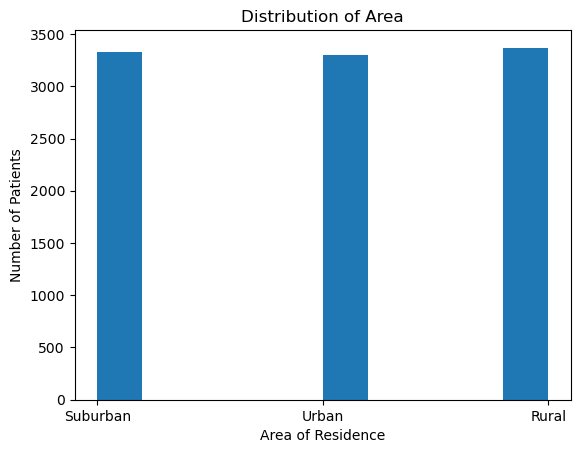

In [4]:
#histogram of categorical 1: Area
import matplotlib.pyplot as plt
plt.hist(medical['Area'])
plt.title('Distribution of Area')
plt.xlabel('Area of Residence')
plt.ylabel('Number of Patients')
plt.show()

In [5]:
# get unique value counts for Area variable
medical['Area'].value_counts()

Area
Rural       3369
Suburban    3328
Urban       3303
Name: count, dtype: int64

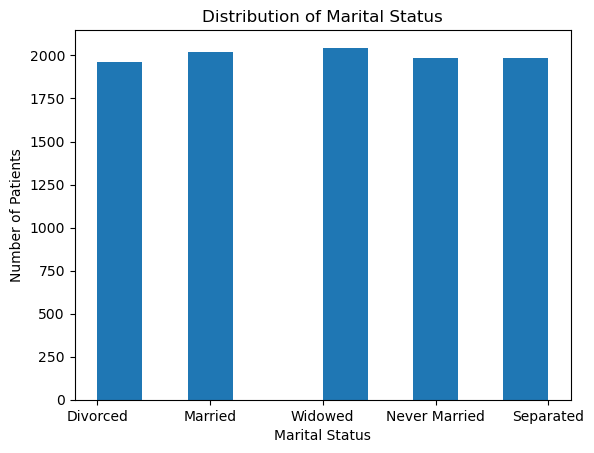

In [6]:
#histogram of categorical 2: Marital
plt.hist(medical['Marital'])
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Patients')
plt.show()

In [7]:
# get unique value counts for Marital variable
medical['Marital'].value_counts()

Marital
Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: count, dtype: int64

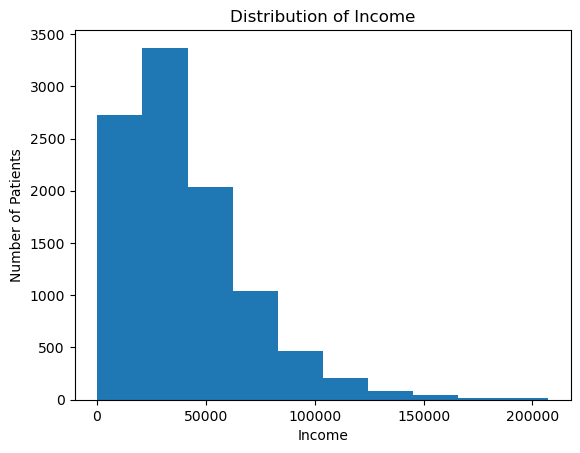

In [8]:
#histogram of continuous 1: income
plt.hist(medical['Income'])
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Number of Patients')
plt.show()

In [9]:
# get stats for income variable
medical['Income'].describe()

count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: Income, dtype: float64

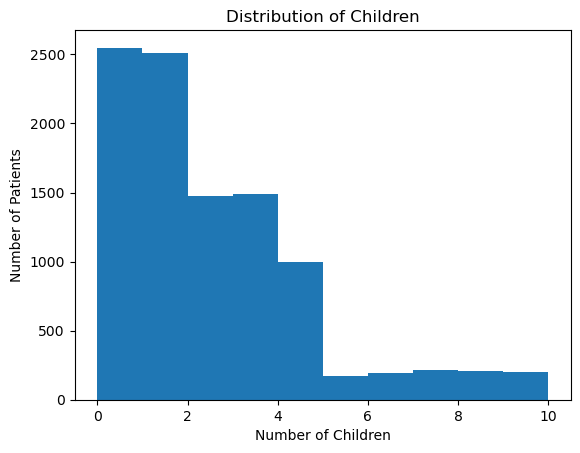

In [10]:
#histogram of continuous 2: children
plt.hist(medical['Children'])
plt.title('Distribution of Children')
plt.xlabel('Number of Children')
plt.ylabel('Number of Patients')
plt.show()

In [11]:
# get stats for children variable
medical['Children'].describe()

count    10000.000000
mean         2.097200
std          2.163659
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         10.000000
Name: Children, dtype: float64

Begin Part D

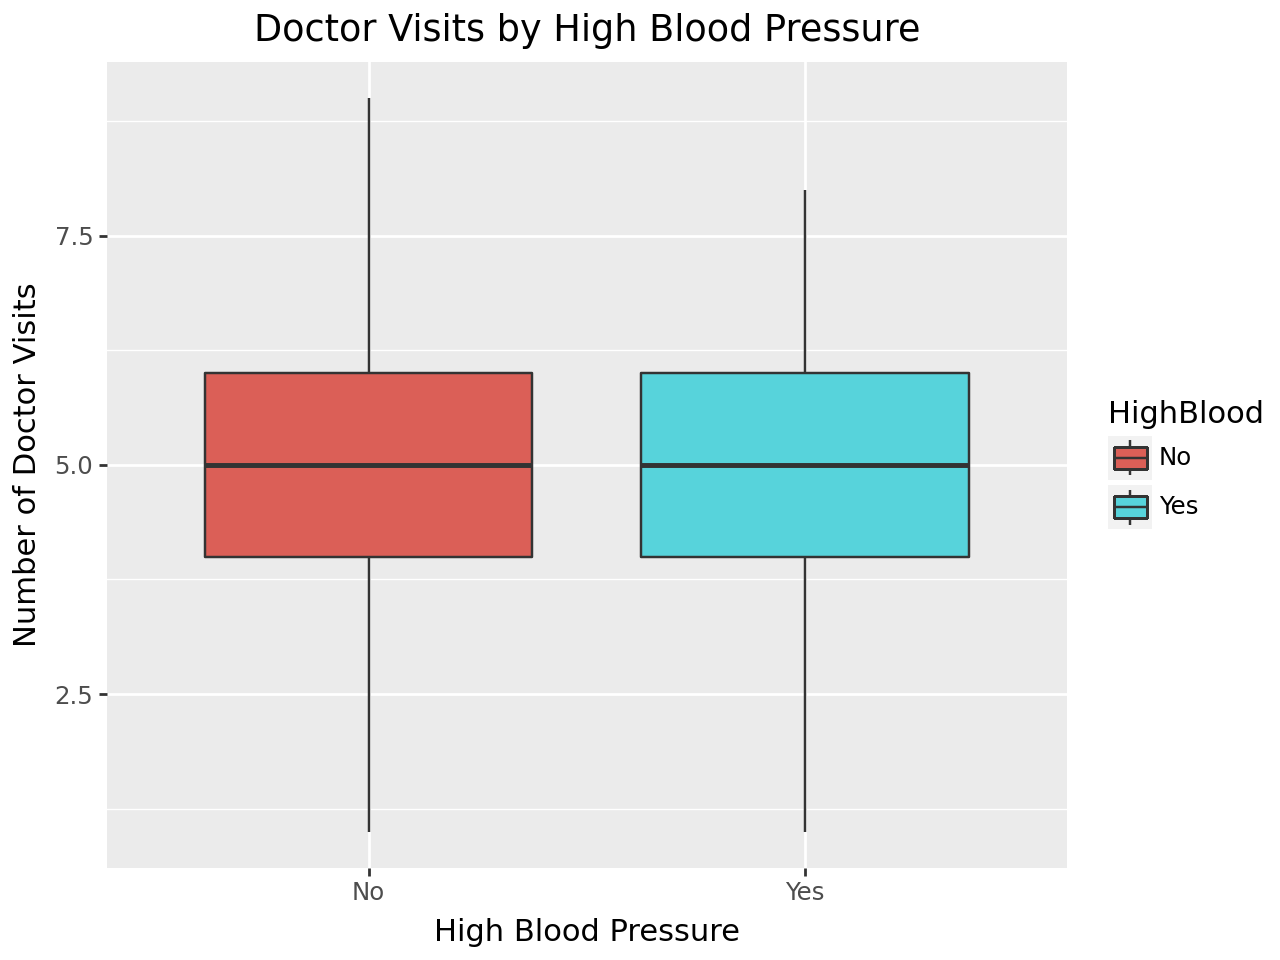

In [12]:
from plotnine import ggplot, aes, labs, geom_boxplot
plot=(ggplot(medical) 
      + aes(x="HighBlood", y="Doc_visits", fill="HighBlood") 
      + labs(title="Doctor Visits by High Blood Pressure", x="High Blood Pressure", y="Number of Doctor Visits") 
      + geom_boxplot())
plot.show()

In [14]:
#create crosstab of highblood/doc_visits variables
crosstab=pd.crosstab(medical.HighBlood,medical.Doc_visits)
print(crosstab)

Doc_visits  1   2    3     4     5     6    7   8  9
HighBlood                                           
No          2  28  359  1436  2244  1452  349  38  2
Yes         4  30  236   949  1579   984  285  23  0


In [15]:
# get stats on Highblood
medical['HighBlood'].value_counts()

HighBlood
No     5910
Yes    4090
Name: count, dtype: int64

In [16]:
# get stats for Doc_visits variable
medical['Doc_visits'].describe()

count    10000.000000
mean         5.012200
std          1.045734
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: Doc_visits, dtype: float64

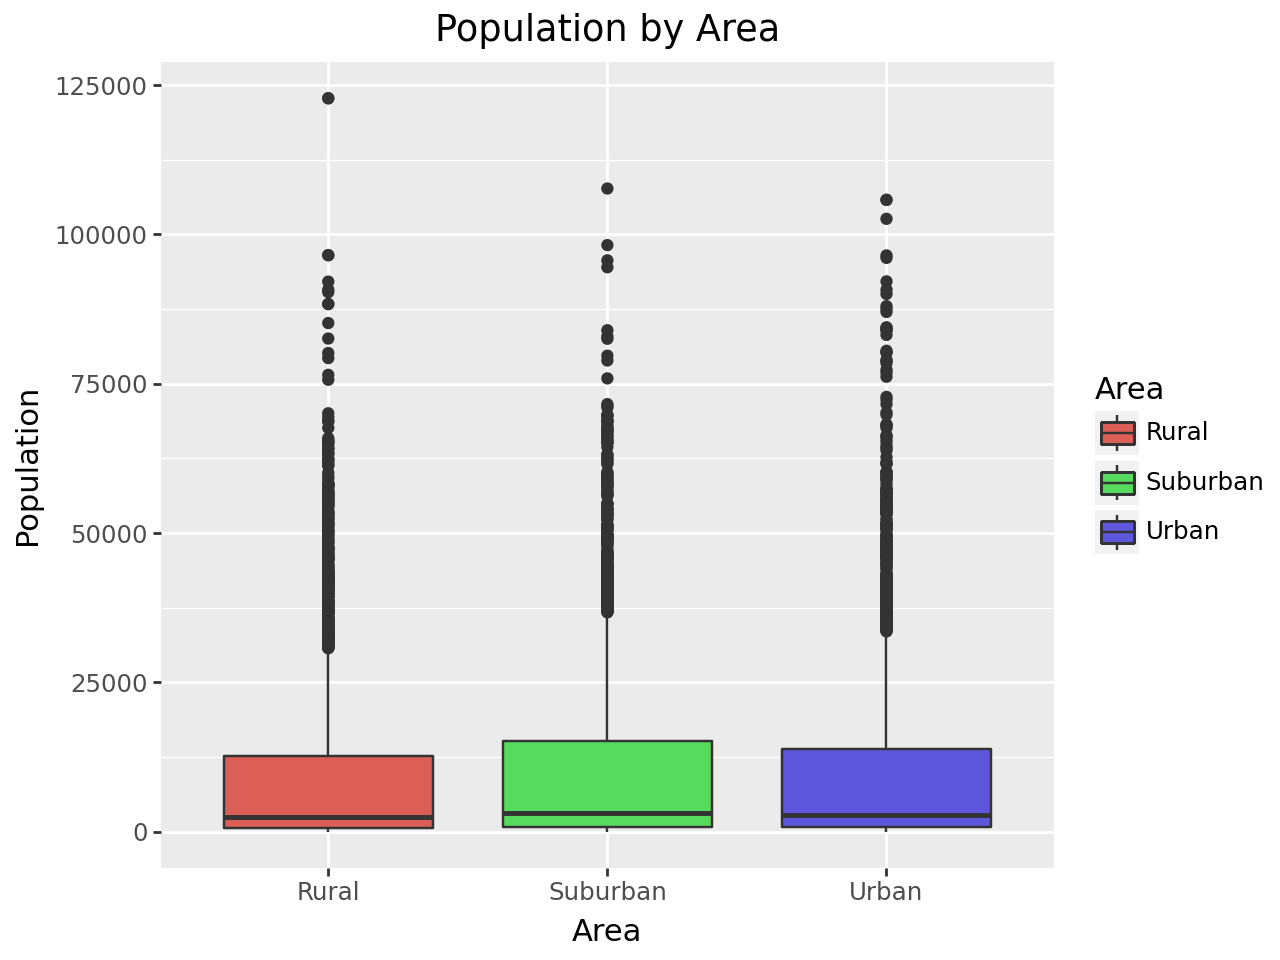

In [13]:
plot=(ggplot(medical) 
      + aes(x="Area", y="Population", fill="Area") 
      + labs(title="Population by Area") 
      + geom_boxplot())
plot.show()

In [18]:
# get stats on Area
medical['Area'].value_counts()

Area
Rural       3369
Suburban    3328
Urban       3303
Name: count, dtype: int64

In [19]:
# get stats for population variable
medical['Population'].describe()

count     10000.000000
mean       9965.253800
std       14824.758614
min           0.000000
25%         694.750000
50%        2769.000000
75%       13945.000000
max      122814.000000
Name: Population, dtype: float64

In [25]:
# get population of just urban area
Urban_population = medical.loc[medical["Area"] == "Urban", ["Population", "Area"]]
Urban_population.describe()

,Population
count,3303.000000
mean,10092.533454
std,15216.290298
min,0.000000
25%,714.500000
50%,2841.000000
75%,13808.500000
max,105799.000000


In [26]:
# get population of just suburban area
Suburban_population = medical.loc[medical["Area"] == "Suburban", ["Population", "Area"]]
Suburban_population.describe()

,Population
count,3328.000000
mean,10324.536659
std,14702.249150
min,0.000000
25%,700.000000
50%,3071.500000
75%,15106.250000
max,107700.000000


In [27]:
# get population of just rural area
Rural_population = medical.loc[medical["Area"] == "Rural", ["Population", "Area"]]
Rural_population.describe()

,Population
count,3369.000000
mean,9485.557139
std,14545.519246
min,0.000000
25%,665.000000
50%,2502.000000
75%,12670.000000
max,122814.000000
